In [2]:
# В данном примере реализована нейросеть которая определяет сообщения - спам или не спам, 
# так же будет преобразование данных которые будут пригодны для обучения нашей нейросети

# Импорт библиотек

import numpy as np
import matplotlib.pyplot as plt 
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split

In [3]:
# Импорт классов

from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Flatten
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model

In [4]:
# Загрузка датасета

!wget https://lazyprogrammer.me/course_files/spam.csv

--2020-09-15 21:01:43--  https://lazyprogrammer.me/course_files/spam.csv
Распознаётся lazyprogrammer.me (lazyprogrammer.me)… 104.31.81.48, 104.31.80.48, 172.67.213.166, ...
Подключение к lazyprogrammer.me (lazyprogrammer.me)|104.31.81.48|:443... соединение установлено.
HTTP-запрос отправлен. Ожидание ответа… 200 OK
Длина: 503663 (492K) [text/csv]
Сохранение в: «spam.csv.8»

spam.csv.8          100%[===================>] 491,86K   557KB/s    за 0,9s    

2020-09-15 21:01:45 (557 KB/s) - «spam.csv.8» сохранён [503663/503663]



In [5]:
# Отображение наших данных в типе DataFrame библиотеки pandas

spam = pd.read_csv('spam.csv', encoding = 'ISO-8859-1')

In [6]:
spam

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [7]:
# Удаление ненужных столбцов

spam= spam.drop([i for i in spam.columns[2:]], axis = 1)
spam.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
spam.columns = ['label', 'data']
spam.head()

,label,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
# Преобразование наших целевых данных из типа 'ham', 'spam' соответственно в 0 и 1

spam['d_label'] = spam['label'].map({'ham': 0, 'spam': 1})
Y = spam.d_label.values         # Запись данных в массив np.array
Y.shape

(5572,)

In [10]:
# Подготовка наших данных в тренировочный и тестовый датасеты

x_train, x_test, y_train, y_test = train_test_split(spam.data, Y, test_size = 0.33)

In [11]:
# Преобразование наших текстовых данных в числовые ибо сеть работает только с числовыми данными

MAX_VOCAB_SIZE = 20000                            # Максимальное число токенов (данных)
tok = Tokenizer(num_words=MAX_VOCAB_SIZE)         # Создание токенайзера (именно он и преобразует слова в числа)
tok.fit_on_texts(x_train)                         # Обучение токенайзера
sequences_train = tok.texts_to_sequences(x_train) # Преобразование данных тренировочного набора 
sequenses_test = tok.texts_to_sequences(x_test)   # Преобразование данных тестового набора

In [12]:
# Сохраняем кол-во уникальных токенов (слов) - нужно для слоя нейронной сети

word2index = tok.word_index
V = len(word2index)
print(V)

7133


In [13]:
# Каждый токен (сообщение) нужно дополнить до одинаковой длины в нашем случае до длины самого длинного токена (сообщения), что мы и делаем

data_train = pad_sequences(sequences_train, maxlen = 189)
T = data_train.shape[1]
data_train

array([[   0,    0,    0, ...,    7, 3439, 1797],
       [   0,    0,    0, ..., 2314, 3441,  752],
       [   0,    0,    0, ...,    2,    3, 1297],
       ...,
       [   0,    0,    0, ...,  305,   29,   46],
       [   0,    0,    0, ...,    3,   21, 7133],
       [   0,    0,    0, ...,    9,  435, 3114]], dtype=int32)

In [14]:
# Аналогично предыдущему

data_test = pad_sequences(sequenses_test, maxlen=T)
data_test[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [15]:
# Создание нашей нейронной сети

D = 20
M = 15
i = Input(shape = (data_test[1].shape))    # Слой ввода
x = Embedding(V+1, D)(i)                   # Данный слой нужен нам для того чтобы преобразовать каждое слово в нашем сообщении в 2-ух мерный вектор который отображает значение данного вектора в декартовой системе координат слова похожие по смыслу будут находиться рядом в декартовой системе координат
x = LSTM(M, return_sequences=True)(x)      # Слой long short term memory тот же самый рекурентный слой только с механизмом памяти
x = Flatten()(x)                           # Преобразование в вектор данных 
x = Dense(1, activation='sigmoid')(x)      # Плносвязный слой предназначен для классификации нашего сообщения

model = Model(i,x)                         # Все слои соединяем в единную сеть
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [16]:
# Обучение модели 

r = model.fit(data_train, y_train, epochs= 10, validation_data=(data_test, y_test))

Train on 3733 samples, validate on 1839 samples
Epoch 1/10
3733/3733 [==============================] - 22s 6ms/sample - loss: 0.3282 - accuracy: 0.8803 - val_loss: 0.1172 - val_accuracy: 0.9603
Epoch 2/10
3733/3733 [==============================] - 19s 5ms/sample - loss: 0.0619 - accuracy: 0.9812 - val_loss: 0.0554 - val_accuracy: 0.9799
Epoch 3/10
3733/3733 [==============================] - 33s 9ms/sample - loss: 0.0278 - accuracy: 0.9920 - val_loss: 0.0463 - val_accuracy: 0.9869
Epoch 4/10
3733/3733 [==============================] - 54s 15ms/sample - loss: 0.0143 - accuracy: 0.9952 - val_loss: 0.0424 - val_accuracy: 0.9897
Epoch 5/10
3733/3733 [==============================] - 60s 16ms/sample - loss: 0.0067 - accuracy: 0.9981 - val_loss: 0.0501 - val_accuracy: 0.9891
Epoch 6/10
3733/3733 [==============================] - 43s 12ms/sample - loss: 0.0056 - accuracy: 0.9987 - val_loss: 0.0493 - val_accuracy: 0.9891
Epoch 7/10
3733/3733 [==============================] - 58s 16ms/sa

In [17]:
model.predict(data_test[np.newaxis,0])

array([[3.7118858e-05]], dtype=float32)

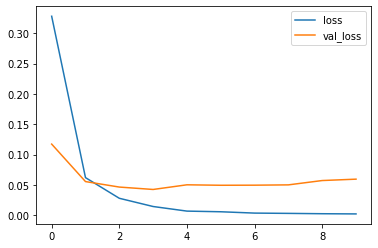

In [18]:
# Визуализация потерь на каждой эпохи в нашей модели

plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

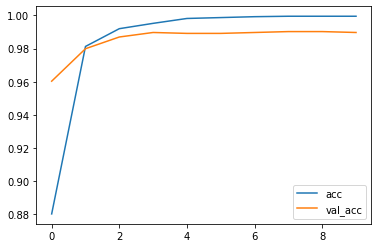

In [19]:
# Визуализация точности нашей модели 

plt.plot(r.history['accuracy'], label = 'acc')
plt.plot(r.history['val_accuracy'], label = 'val_acc')
plt.legend()

In [154]:
# Проверка нашей модели на тестовых данных

target_pred = []
count_ham = 0                                       # Счетчик сообщений "не спам"
count_spam = 0                                      # Счетчик сообщений "спам"
index_spam = np.where(y_test == 1)[0]               # Находим все индексы спам сообщений 
model_pred = model.predict(data_test[index_spam])   # Пропускаем через сеть все спам сообщения 
for i in model_pred:
    if i[0] > 0.5:
        count_spam += 1
        target_pred.append('Spam')
    else:
        count_ham += 1
        target_pred.append('Ham')
print('Count of valid classified = {}, not valid = {}'.format(count_spam, count_ham))    # Выводим кол-во спам и не спам сообщений
                                                                                         # хотя все являются спам 

Count of spam = 222, of ham = 14


In [168]:
# Создаем свое сообщение похожее на спам и пропускаем через сеть, но сначала преобразуем в подобающий вид 
# дабы пропустить через сеть

example_sentence = ['Today you win a new Iphone 10 XS, just click on that button ']
example_sentence = tok.texts_to_sequences(example_sentence)
example_sentence = pad_sequences(example_sentence, 189)
if model.predict(example_sentence)[0][0] > 0.5:
    print('Spam')
else:
    print('Not Spam')

Spam
